https://github.com/Jo-hn-bit/Pf-Project

In [30]:
import pandas as pd
import numpy as np
spending_data = pd.read_csv("uncleaned_spending_patterns.csv")
spending_data.columns

Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Payment Method', 'Location', 'Transaction Date',
       'Weather on Transaction Day', 'Mood', 'Transaction Type',
       'Day of Week'],
      dtype='object')

In [31]:
spending_data.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Weather on Transaction Day,Mood,Transaction Type,Day of Week
0,CUST_0159,Groceries,Milk,1.0,1.28,1.28,Debit Card,**Mobile App$$,11/13/24,Cloudy,Happy,In-store,**Wednesday$$
1,CUST_0017,Friend Activities,Dinner with Friends,2.0,74.69,149.39,Debit Card,In-store,5/4/23,**Cloudy$$,Sad,Online,Thursday
2,CUST_0094,Housing and Utilities,**Water Bill$$,1.0,76.06,76.06,Digital Wallet,Mobile App,12/16/23,Windy,Excited,In-store,Saturday
3,NaN,NaN,NaN,5.0,11.24,56.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CUST_0129,Gifts,**Flowers$$,3.0,43.71,131.12,Debit Card,**In-store$$,7/28/23,Snowy,Excited,Online,Friday


In [32]:
spending_data = spending_data.drop(columns= ['Customer ID','Mood','Weather on Transaction Day','Location'])#Removing Unwanted Columns

In [33]:
cleaned_duplicate_rows = spending_data.drop_duplicates()#Remove Duplicate Rows
cleaned_duplicate_rows.head()

,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Transaction Type,Day of Week
0,Groceries,Milk,1.0,1.28,1.28,Debit Card,11/13/24,In-store,**Wednesday$$
1,Friend Activities,Dinner with Friends,2.0,74.69,149.39,Debit Card,5/4/23,Online,Thursday
2,Housing and Utilities,**Water Bill$$,1.0,76.06,76.06,Digital Wallet,12/16/23,In-store,Saturday
3,NaN,NaN,5.0,11.24,56.18,NaN,NaN,NaN,NaN
4,Gifts,**Flowers$$,3.0,43.71,131.12,Debit Card,7/28/23,Online,Friday


In [34]:
spending_data = spending_data.dropna()
spending_data.tail()

,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Transaction Type,Day of Week
9995,Housing and Utilities,Water Bill,1.0,69.46,69.46,Debit Card,9/1/23,In-store,Friday
9996,Groceries,Snacks,5.0,15.54,77.70,Debit Card,6/27/24,Online,Thursday
9997,Shopping,Electronics,1.0,732.03,732.03,Debit Card,3/19/24,In-store,Tuesday
9998,Transportation,Car Repair,1.0,107.63,107.63,Debit Card,10/17/24,Online,Thursday
9999,Housing and Utilities,Gas Bill,1.0,98.79,98.79,Credit Card,8/4/24,In-store,Sunday


In [35]:
spending_data = spending_data.replace(r'[\*\$\#]', '', regex=True) 
spending_data


,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Transaction Type,Day of Week
0,Groceries,Milk,1.0,1.28,1.28,Debit Card,11/13/24,In-store,Wednesday
1,Friend Activities,Dinner with Friends,2.0,74.69,149.39,Debit Card,5/4/23,Online,Thursday
2,Housing and Utilities,Water Bill,1.0,76.06,76.06,Digital Wallet,12/16/23,In-store,Saturday
4,Gifts,Flowers,3.0,43.71,131.12,Debit Card,7/28/23,Online,Friday
5,Gifts,Flowers,2.0,15.87,31.74,Digital Wallet,7/14/24,Online,Sunday
...,...,...,...,...,...,...,...,...,...
9995,Housing and Utilities,Water Bill,1.0,69.46,69.46,Debit Card,9/1/23,In-store,Friday
9996,Groceries,Snacks,5.0,15.54,77.70,Debit Card,6/27/24,Online,Thursday
9997,Shopping,Electronics,1.0,732.03,732.03,Debit Card,3/19/24,In-store,Tuesday
9998,Transportation,Car Repair,1.0,107.63,107.63,Debit Card,10/17/24,Online,Thursday


In [36]:
spending_data.groupby(['Category', 'Item']).size()

Category               Item               
Fitness                Personal Trainer       235
                       Workout Equipment      245
                       Yoga Class             237
Food                   Coffee                 248
                       Fast Food              236
                       Restaurant Meal        216
Friend Activities      Concert Tickets        200
                       Dinner with Friends    237
                       Movie Tickets          228
Gifts                  Flowers                189
                       Gift Cards             159
                       Jewelry                168
                       Kids Games             173
Groceries              Bread                  111
                       Chicken                101
                       Fruits                 100
                       Meat                    88
                       Milk                    90
                       Snacks                 114
       

In [37]:
category_summary = spending_data.groupby("Category")["Total Spent"].sum().sort_values(ascending=False)
category_summary

Category
Shopping                 20717989.15
Housing and Utilities      737033.08
Fitness                    301591.39
Medical/Dental             268409.80
Travel                     249555.27
Gifts                      220158.11
Personal Hygiene           219746.11
Friend Activities          131651.69
Transportation             115319.82
Hobbies                     77863.39
Food                        46706.83
Subscriptions               15820.11
Groceries                   15579.84
Name: Total Spent, dtype: float64

<Axes: title={'center': 'Total Spent per Category'}, ylabel='Category'>

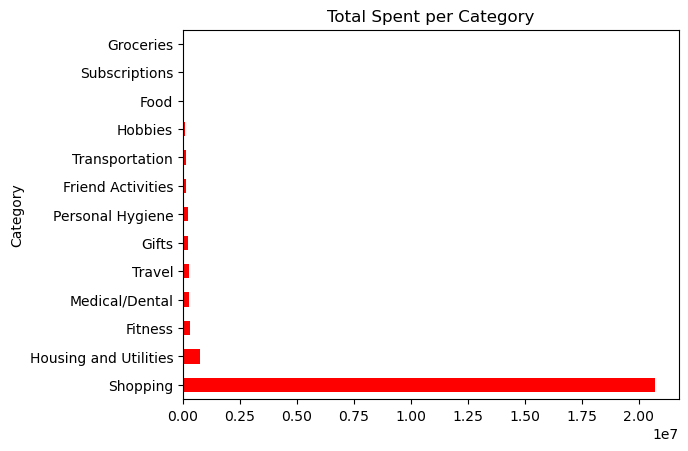

In [38]:
category_summary.plot(kind="barh", title="Total Spent per Category", color='red')

<Axes: title={'center': 'Total Spent per Category'}, ylabel='Total Spent'>

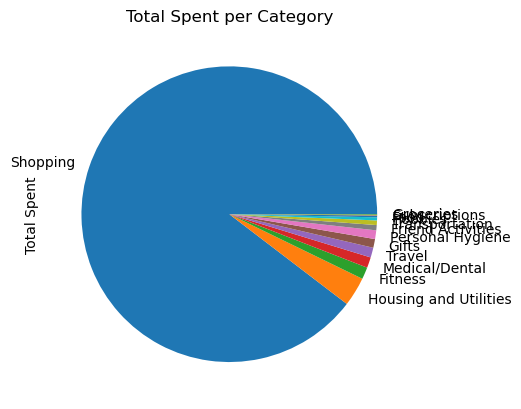

In [61]:
category_summary.plot(kind="pie", title="Total Spent per Category")

<Axes: title={'center': 'Total Spent per Category'}, xlabel='Category'>

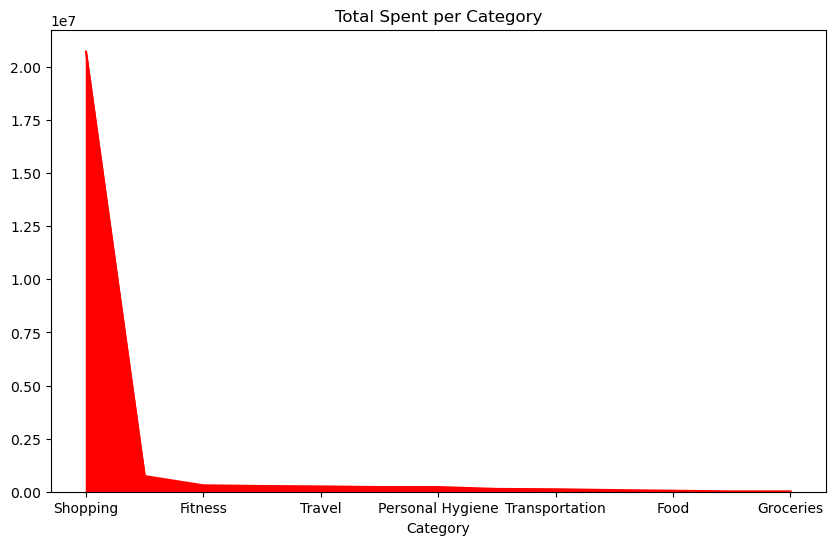

In [47]:
category_summary.plot(kind="area", title="Total Spent per Category", figsize=(10,6), color='red')

In [48]:
average_amount_spent_on_shopping  = spending_data['Total Spent'].mean()
print("Average Ammount Spent on Shopping is: ", average_amount_spent_on_shopping)

Average Ammount Spent on Shopping is:  2577.4807213736203


In [49]:
item_summary = spending_data.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
item_summary.head()


Item
Car                   20171116.96
Rent                    686751.29
Electronics             444607.88
Skin Care Products      209490.21
Workout Equipment       200676.43
Name: Total Spent, dtype: float64

In [50]:
filtered_data_for_shopping = spending_data[spending_data['Item'] == 'Car']
average_amount_spent_on_cars  = spending_data['Total Spent'].mean()
print("Average Ammount Spent on Shopping is: ", average_amount_spent_on_shopping)

Average Ammount Spent on Shopping is:  2577.4807213736203


<Axes: title={'center': 'Total Spent per Item in Shopping'}, xlabel='Item'>

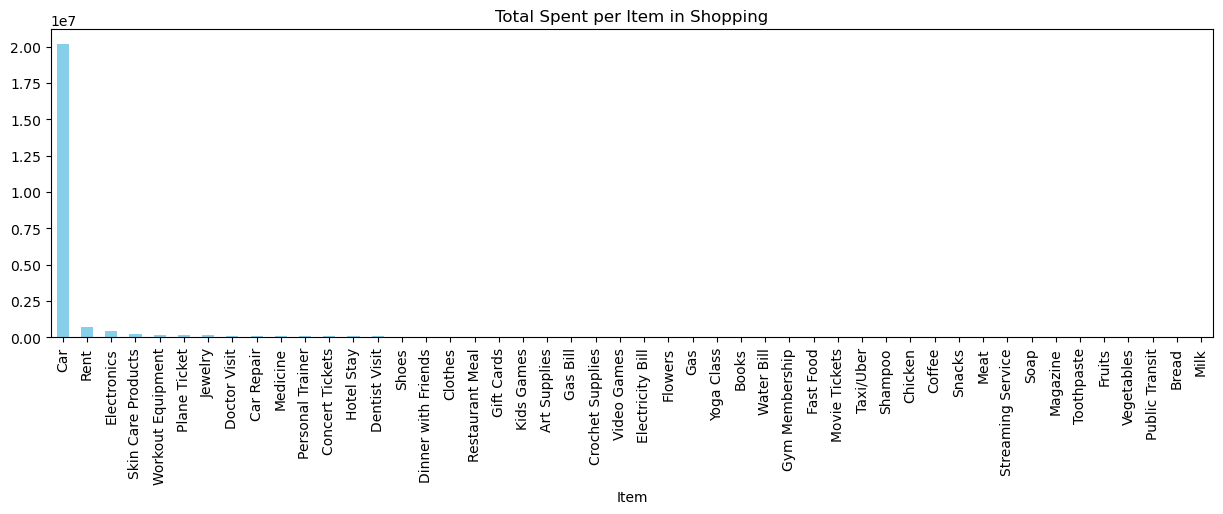

In [64]:
item_summary.plot(kind="bar", title="Total Spent per Item in Shopping", figsize=(15, 4), color='skyblue')

In [52]:
transaction_summary = spending_data.groupby(['Category', 'Transaction Type']).size()
transaction_summary

Category               Transaction Type
Fitness                In-store            346
                       Online              371
Food                   In-store            379
                       Online              321
Friend Activities      In-store            340
                       Online              325
Gifts                  In-store            335
                       Online              354
Groceries              In-store            367
                       Online              348
Hobbies                In-store            343
                       Online              337
Housing and Utilities  In-store            345
                       Online              343
Medical/Dental         In-store            341
                       Online              352
Personal Hygiene       In-store            334
                       Online              357
Shopping               In-store            362
                       Online              350
Subscriptions       

In [53]:
filtered_data_for_shopping = spending_data[spending_data['Category'] == 'Shopping']
shopping_payment_summary = filtered_data_for_shopping.groupby("Payment Method")["Total Spent"].sum().sort_values()
shopping_payment_summary


Payment Method
Debit Card        2477169.16
Credit Card       5626155.85
Cash              6116963.77
Digital Wallet    6497700.37
Name: Total Spent, dtype: float64

<Axes: title={'center': 'Most common payment Method'}, xlabel='Payment Method'>

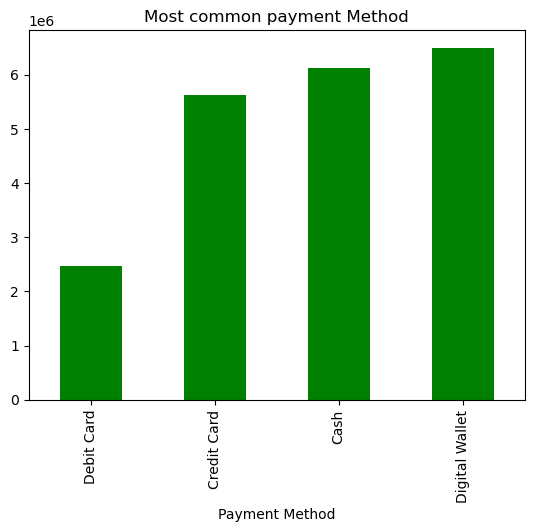

In [54]:
shopping_payment_summary.plot(kind="bar", title="Most common payment Method", color='green')

In [55]:

shopping_transaction_summary = filtered_data_for_shopping.groupby(['Category', 'Transaction Type']).size()
shopping_transaction_summary


Category  Transaction Type
Shopping  In-store            362
          Online              350
dtype: int64

<Axes: title={'center': 'Transaction Type in shopping'}, xlabel='Category,Transaction Type'>

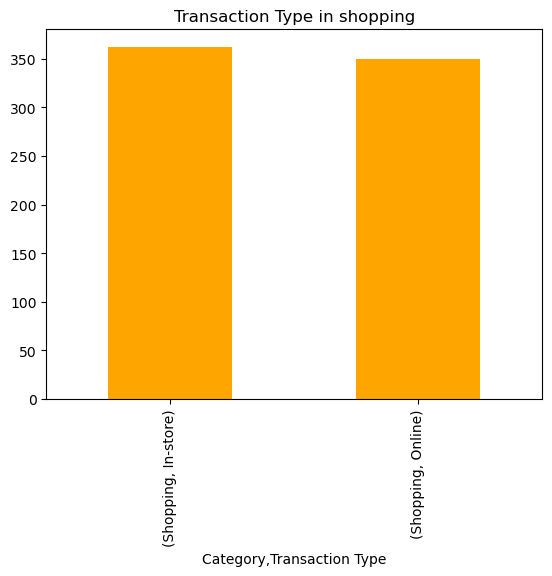

In [56]:
shopping_transaction_summary.plot(kind="bar", title="Transaction Type in shopping", color='orange')

In [57]:
category_summary.to_csv('Category_Summary.csv')
filtered_data_for_shopping.to_csv('Shopping_data.csv')
item_summary.to_csv('Shopping_items_summary.csv')
spending_data.to_csv('cleaned_data.csv')

